 ## Classical Mechanics - Week 6 Answers

### Last Week:

- Learned how to graph in 3D
- Analzed graphs that model potential $U$
- Used sympy and matplotlib to 3D graph these models

### This Week:
- Gain more practice with functions
- Learn about Simpson's Rule
- Further explore numerical methods

Do you smell that? It's midterm season, so let's take it easy this week and get some more familiarity with funcitons and the numerical analysis. More specifically: we are going to see the power of **Simpson's Rule**.

In [2]:
# As usual, we will need packages
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing(use_unicode=True) 

# Simpson's Rule

This is a method for numerical integration helping to approximate definite integrals. It goes as follows:

$\int_a^b f(x) \ dx \approx \dfrac{\Delta x}{3}(f(x_0)+4f(x_1)+2f(x_2)+4f(x_3)+2f(x_4)+{...}+4f(x_{n-1})+f(x_n))$,

where $\Delta x = \dfrac{b-a}{n}$ is our step sizes and $n$ is the number of steps we will use to perform the approximation.

Below is the code for the Simpson's method. **Please read the comments to understand how the formula above translates to code.**



In [16]:
## Let's implement Simpson's method!
def Simpsons(equation,a,b,n): 
    ## "equation" is the equation we want to evaluate. 
    ## "a" and "b" are our initial and final positions we want to integrate over
    ## "n" is the number of steps we want to take 
    
    delx = (b-a)/n ## Calculating our steps sizes
    approximation = equation(a) ## We Begin by adding the first position, this is f(x_0)
    a += delx ## Then we add our step size to our "a" to go on to x_1
    itteration = 0 ## We will use an itteration tracker to know when to multiply by 4 or 2 in our steps
    
    while a < b: ## We will go from x_1 to x_(n-1)
        if itteration%2 == 0: ## If "itteration" is even, then we will multiply f(x_n) by 4
            approximation += 4*equation(a)
        else: ## If the "itteration" is odd, then we will multiply f(x_n) by 2
            approximation += 2*equation(a)
        
        a += delx ## We will then add the step size to our "a"
        itteration += 1 ## Adding to our "itteration" so we can utilize the 4-2 switches from Simpson's Method
    
    approximation += equation(b) ## Now we will add f(x_n) to our summation 
    approximation = (delx*approximation)/3 ## Finally, we will be dividing everything by 3 and multiplying by step size
    
    return approximation ## Returns our approximation

# Q1.) What lines of the above code deal with the "$4f(x_1) + 2f(x_2) + ...$" section of Simpson's Rule? i.e. The section where the function is multiplied by either 4 or 2 depending on the itteration.
If you click to the left of the code-cell, but still within page boundary, and press "l" you can toggle lines on and off.

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible Answer #######

Lines 12-16

####### Possible Answer #######

# Q2.) How does the function decide when to multiply by either 4 or 2?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible Answer #######

It sets up an "itteration" variable, that when even will multiply by 4 and when odd will multiply by 2.

####### Possible Answer #######

--------------------
#### Now let's test our Simpson's Method function. Below is a function for the equation $f(x) = x^2$. 

The integral for this is $\int x^2 \ dx = \dfrac{x^3}{3}$. We will plug the function itself into Simpsons from $x=0$ to $x=3$. Play around with the step numbers to see when we can achieve a reasonable accuracy. Does larger $n$ always provide a more accurate answer?

In [74]:
def F(x):
    return x**2

In [75]:
I = Simpsons(F,0,3,10000)
I

Below is a tester that will use a threshold to decide if our estimate is satisfactory. Feel free to change the threshold as you see fit.

In [72]:
def isclose(estimate, actual, threshold=.0000001):
    return abs(estimate-actual) <= threshold

In [73]:
isclose(I,9)

True

# But why use numerical analysis instead of just doing the integration?
Another great question! 

Let's start by finding the definite integral of $f(x) = x^2$ from 0 to 3 using sympy. Below we have the integral function set up, but not the equation. Complete the code by defining $f(x) = x^2$

In [51]:
x = sym.symbols('x') ## Sets our x variable as 'x' for sympy
f = x**2 ## Sets up a function for sympy
sym.integrate(f,x) ## Integrates using sympy

Now let's use sympy to take the integral from 0 to 3!

In [52]:
sym.integrate(f,(x,(0,3))) ## Same steps as above, except now we make our x go from 0-3. Notice the parentheses placement.

Now do the same thing as above, but with the function $g(x) =  e^{x^2}$. Find the integral then the definite integral from 0 to 3.

What do you get?

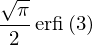

In [56]:
## One possible way of implementing the integral
g = sym.exp(x**2)
sym.integrate(g,(x,(0,3)))

# Q3.) What answer did sympy give you for the integral of $e^{x^2}$?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible Answers #######

- $\dfrac{\sqrt{\pi}}{2}erif(3)$

- Error

- Doesn't look right

####### Possible Answers #######

As we can see, the equation that is the integral of $g(x) =  e^{x^2}$ cannot be found even by computers! However, this does not mean we cannot find a strong approximation of the definite integral from 0 to 3! 

This is where numerical analysis comes in through Simpson's method. Try creating a new g function **NOT** using sympy and plug it into our Simpson's funciton.

In [71]:
def G(x):
    return np.exp(x**2)
I2 = Simpsons(G,0,3,1000)
I2

# Q4.) What is an approximation of $e^{x^2}$ definite of integral from 0 to 3? 

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible Answer #######

1444.5

####### Possible Answer #######

# Q5.) How many steps, n, did you use to get this approximation?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible Answer #######

1000

####### Possible Answer #######

# Notebook Wrap-up. 
Run the cell below and copy-paste your answers into their corresponding cells.

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/2Ax1XFtWZhjJOHym2" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

# You've reached the end! Good job!

Hopefully you've seen the potential of why numerical analysis is important, even with the existance of derivative and integral methods. Feel free to play around with all the code and skills you've accumulated thus far, or whatever you want. It's a free world, to a degree, and I can't really control what you want to do with this information.